# Some analysis on MIMIC IV data

This is not the exclusive analysis of data. For example the correlation plots are done in another notebook

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import missingno as msno

%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:

path_figures = Path('../../figures/')

miiv_path = '~/Documents/data/ts/miiv/fully_observed/miiv_ts_wide.csv.gz'
miiv_path_p = '~/Documents/data/ts/miiv/fully_observed/miiv_ts_wide.parquet'
# df = pd.read_csv(miiv_path)
df = pd.read_parquet(miiv_path_p)
df['time'] = df['time'].apply(lambda x: x.total_seconds() / 60 / 60)
df.head()

In [10]:
df.head()

,id,time,label,alb,alp,alt,ast,be,bicar,bili,...,phos,plt,po2,ptt,resp,sbp,temp,tnt,urine,wbc
0,30000153,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14.0,124.5,36.000000,NaN,280.0,NaN
1,30000153,1.0,False,NaN,NaN,NaN,NaN,-3.0,NaN,NaN,...,NaN,NaN,242.0,NaN,16.0,141.0,37.277778,NaN,45.0,NaN
2,30000153,2.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN
3,30000153,3.0,False,NaN,NaN,NaN,NaN,-4.0,19.0,NaN,...,3.1,173.0,215.0,25.3,14.0,116.0,37.500000,NaN,50.0,17.0
4,30000153,4.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20.0,111.0,NaN,NaN,45.0,NaN


# Total number of patient IDs (patient visits)

The total number of patient visits is 67056.

> Note: The number of actually used patients might be reduced, as we now look at the length distribution of the patient stays and might decide to kick out the long ones.

In [ ]:
df['id'].unique().shape

: 

# Length of patient visis

For how long (hours) do the patients visit the ICU?


In [2]:
grouped = df.groupby('id')
group_lengths = grouped.apply(len)
print(f'Mean stay length: {group_lengths.mean():.2f} hours')
print(f'Median stay length: {group_lengths.median():.2f} hours')
print(f'Std stay length: {group_lengths.std():.2f} hours')
percent_above_hundred = (group_lengths > 100).sum() / len(group_lengths)
print('Percent of stays above 100 hours: {:.2f}%'.format(percent_above_hundred * 100))
print('Longest stay: {} hours'.format(group_lengths.max()))

Mean stay length: 52.97 hours
Median stay length: 40.00 hours
Std stay length: 40.93 hours
Percent of stays above 100 hours: 12.56%
Longest stay: 169 hours


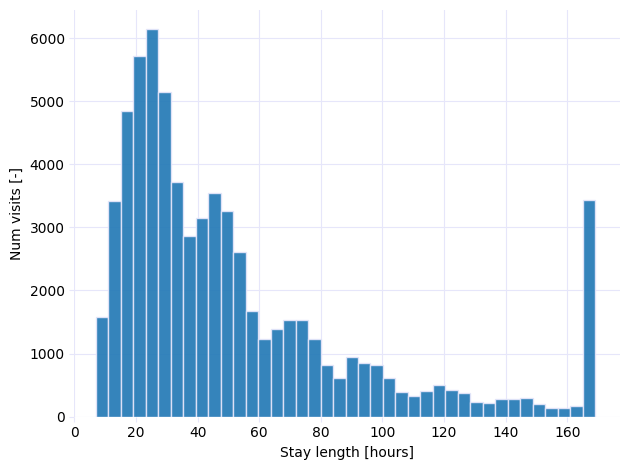

In [3]:
ax = group_lengths.plot.hist(bins=40, zorder=2, alpha=0.9, edgecolor='lavender', linewidth=1)
plt.xlabel('Stay length [hours]')
plt.ylabel('Num visits [-]')
# plt.axvline(100, ls='--', color='grey')
ax.spines[:].set_visible(False)
# ax.set_facecolor('lavender')
# ax.grid(visible=True, color='white')
# ax.set_facecolor('lavender')
ax.grid(visible=True, color='lavender')
ax.tick_params(axis='both', which='both', color='lavender', direction='out')
ax.set(xlim=(0, None), ylim=(0, None))
plt.tight_layout()
plt.savefig(path_figures / 'miiv_stay_length_hist.svg', bbox_inches='tight')
plt.show()

---

# Sepsis prevalence

What is the sepsis prevalence in this cohort?

In [24]:
grouped = df.groupby('id')
greater_than_zero = grouped.apply(lambda x: (x['label'] == 1).any())
sepsis_prevalence = greater_than_zero.sum() / len(greater_than_zero)
print(f'Num sepsis patients: {greater_than_zero.sum()} / {len(grouped)}')
print(f'Sepsis prevalence: {sepsis_prevalence*100:.2f} %')

Num sepsis patients: 3730 / 67056
Sepsis prevalence: 5.56 %


---

# Variables and the mean + std

In [7]:
df.mean().round(2)

id          34973435.70
time              41.80
label              0.01
alb                3.10
alp              121.76
alt              254.01
ast              310.06
be                -0.57
bicar             24.01
bili               2.50
bili_dir           3.33
bnd                4.01
bun               27.66
ca                 8.40
cai                1.13
ck              2100.75
ckmb              22.28
cl               103.38
crea               1.48
crp               76.86
dbp               63.87
fgn              271.67
fio2              50.94
glu              139.22
hgb               10.11
hr                84.02
inr_pt             1.49
k                  4.15
lact               2.36
lymph             13.97
map               79.28
mch               30.01
mchc              33.04
mcv               90.91
methb              1.75
mg                 2.09
na               138.39
neut              76.51
o2sat             96.09
pco2              42.08
ph                 7.38
phos            

In [9]:
df.std().round(2)

id          2889666.58
time             38.34
label             0.12
alb               0.64
alp             129.75
alt             950.82
ast            1206.43
be                4.92
bicar             4.87
bili              5.29
bili_dir          4.73
bnd               6.54
bun              22.85
ca                0.78
cai               0.10
ck            11303.42
ckmb             53.10
cl                6.67
crea              1.49
crp              80.93
dbp              15.07
fgn             155.32
fio2             18.78
glu              57.82
hgb               2.01
hr               17.60
inr_pt            0.80
k                 0.64
lact              2.06
lymph            11.96
map              15.32
mch               2.52
mchc              1.66
mcv               6.74
methb             4.57
mg                0.37
na                5.57
neut             15.46
o2sat             3.24
pco2             11.11
ph                0.08
phos              1.40
plt             105.71
po2        

---
# Missingness visualization by column

/home2/joshua.wendland/Documents/sepsis/sepsis_env/lib/python3.8/site-packages/missingno/missingno.py:324: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels([f'{l:.0%}' for l in ax3.get_xticks()], fontsize=fontsize)


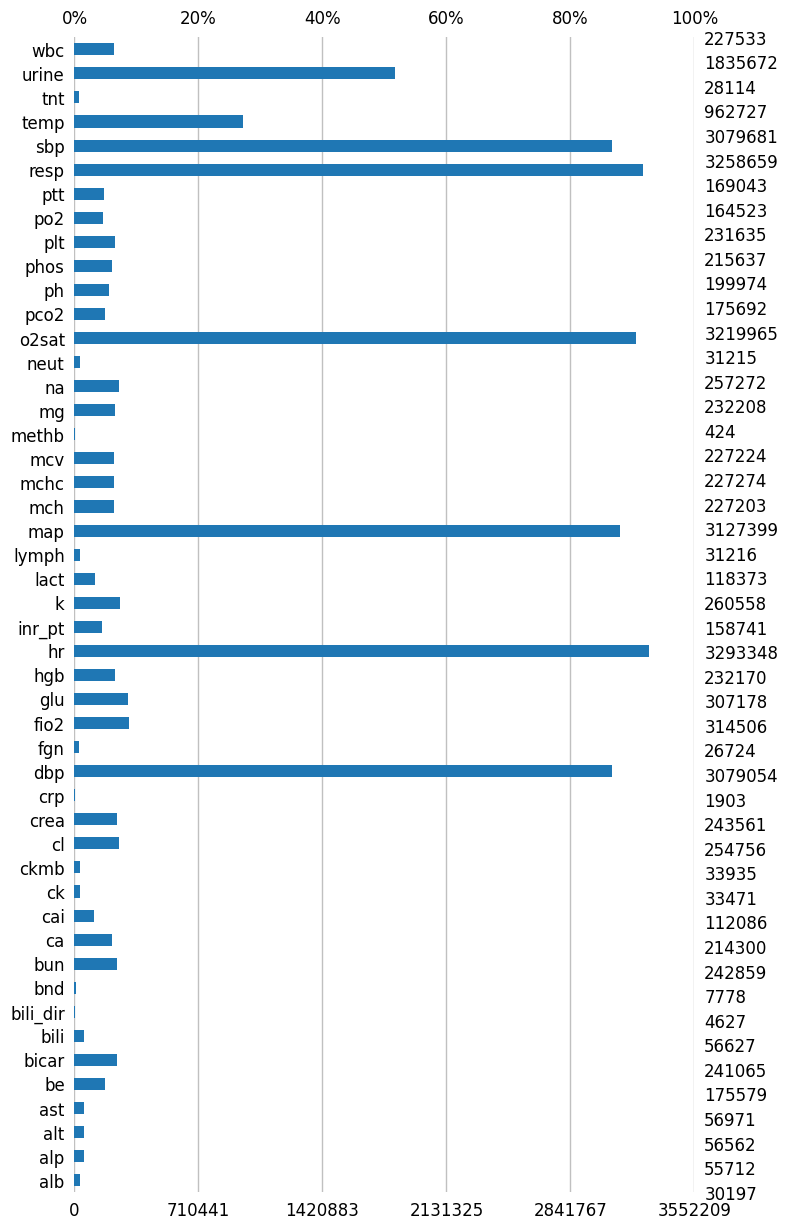

In [39]:
import missingno as msno
ax = msno.bar(df.iloc[:,3:], figsize=(8, 15), fontsize=12, log=False, color='C0')
plt.savefig(path_figures / 'miiv_missingness_per_var.pdf', bbox_inches='tight')